In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 
import numpy as np
from scipy import stats

In [2]:
#para cargar los datos hay 2 posibilidades, una es abrir el data y copiar el lin y pegarlo aca (en caso de ser separado por ej por ";" le pongo sep=";")
#la otra posibilidade es abrir directamente mi desde documentos y material de la facu, mi archivo csv directo en visual, llevarlo en visual a la misma carpeta donde estamos trabajando y poner ese nombre cortido adentro de los parentesis  (en caso de ser separado por ej por ";" le pongo sep=";")

import pandas as pd
stock=pd.read_csv("https://raw.githubusercontent.com/AJVelezRueda/Fundamentos_de_informatica/master/Ciencia_de_datos/practicos/recursos/dataset_clustering_teorico.csv")

In [3]:
#auxiliar para conocer un poco el df
stock.head()

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [4]:
#para inspeccionar:
 
# inspecciono ->que columnas q tipos de datos datos nulos
#nos dice nombre de las columnas
#de que tipo es cada columna:(int, float, object(cualquier cosa que no sea nro->es str en general))
#y dice cantidad de datos no nulos por columna(arriba dice rageindex:1000 entries(eso es cant de entradas,
#  ese nro -datos no nulos, me da datos nulos por columna))
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Columns: 964 entries, Unnamed: 0 to 2013-10-29
dtypes: float64(963), object(1)
memory usage: 452.0+ KB


<AxesSubplot:>

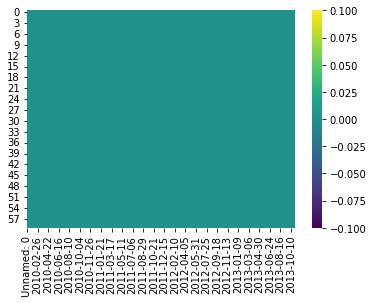

In [5]:
#auxiliar->hago grafico para ver datos nulos:

#inspección de los datos de forma visual
#Grafico para saber donde estan los datos nulos en q columna y en que fila
#->lineas amarillas muestran los datos nulos con respecto a datos totales
sns.heatmap(stock.isnull(), cmap='viridis') #Aux: (nombre de df.isnull(), cmap:color


con lo que me deuvelve puedo notar que No tiene datos nulos->se ve que no hay rayitas amarillas

In [6]:
#para caracterizarlo estadisticamente:

#muestra para cada columna numerica, cantidad, media, desvio estandar, min, max, los quartiles
stock.describe()
#viendo media y mediana no podemos asegurar si es o no normal, para esto hay que hacer test de normalidad


,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.277166,0.079334,-0.327333,-0.081833,0.475168,-0.291500,-0.101167,0.528000,0.303666,-0.674500,...,0.765817,0.906833,1.016166,-0.152833,0.177250,0.543083,0.311498,-0.083667,0.280001,0.274500
std,0.679217,0.793585,2.380234,2.138296,1.433856,1.118415,1.121530,1.508851,1.047321,1.831198,...,1.788782,1.824133,4.745266,1.823094,1.308681,4.159633,1.868696,2.118430,0.922479,3.488336
min,-2.350006,-3.189984,-17.599998,-15.299993,-2.020004,-4.770012,-7.170008,-0.469994,-1.790001,-13.340041,...,-0.810002,-4.200020,-1.020004,-8.159984,-6.540016,-5.029984,-6.320089,-13.620034,-1.760009,-19.589981
25%,0.040002,-0.167501,-0.212501,-0.122502,-0.025000,-0.340000,-0.185000,0.017501,-0.082495,-0.605000,...,0.095002,0.280000,-0.060001,-0.332497,-0.015002,-0.279998,-0.197503,-0.202501,-0.097504,-0.035000
50%,0.295001,0.010001,-0.005000,0.084993,0.150001,-0.059997,0.070000,0.205002,0.139999,-0.359999,...,0.335004,0.454999,0.035002,0.000000,0.174999,-0.084999,0.025001,-0.005000,0.070002,0.149998
75%,0.580000,0.325004,0.259999,0.380000,0.555002,0.112501,0.330001,0.507500,0.392499,-0.137500,...,0.805000,1.139999,0.345000,0.192502,0.577495,0.147498,0.382500,0.299998,0.400001,0.422499
max,3.029999,3.139999,1.630005,3.349991,10.020000,3.179996,1.479996,10.599985,5.949977,0.839996,...,12.160008,11.949997,34.830004,9.590019,4.820008,30.409929,10.140000,4.790009,5.910034,17.139948


In [7]:
#me fijo las columnas que me van a importar para trabajar: ->todas son numericas y me importan por ende no elimino ninguna
#hago lista con nombres de columnas
columnass=list(stock.columns)
columnass

['Unnamed: 0',
 '2010-01-04',
 '2010-01-05',
 '2010-01-06',
 '2010-01-07',
 '2010-01-08',
 '2010-01-11',
 '2010-01-12',
 '2010-01-13',
 '2010-01-14',
 '2010-01-15',
 '2010-01-19',
 '2010-01-20',
 '2010-01-21',
 '2010-01-22',
 '2010-01-25',
 '2010-01-26',
 '2010-01-27',
 '2010-01-28',
 '2010-01-29',
 '2010-02-01',
 '2010-02-02',
 '2010-02-03',
 '2010-02-04',
 '2010-02-05',
 '2010-02-08',
 '2010-02-09',
 '2010-02-10',
 '2010-02-11',
 '2010-02-12',
 '2010-02-16',
 '2010-02-17',
 '2010-02-18',
 '2010-02-19',
 '2010-02-22',
 '2010-02-23',
 '2010-02-24',
 '2010-02-25',
 '2010-02-26',
 '2010-03-01',
 '2010-03-02',
 '2010-03-03',
 '2010-03-04',
 '2010-03-05',
 '2010-03-08',
 '2010-03-09',
 '2010-03-10',
 '2010-03-11',
 '2010-03-12',
 '2010-03-15',
 '2010-03-16',
 '2010-03-17',
 '2010-03-18',
 '2010-03-19',
 '2010-03-22',
 '2010-03-23',
 '2010-03-24',
 '2010-03-25',
 '2010-03-26',
 '2010-03-29',
 '2010-03-30',
 '2010-03-31',
 '2010-04-01',
 '2010-04-05',
 '2010-04-06',
 '2010-04-07',
 '2010-04-

In [8]:
del(columnass[0]) #listo ya elimine la 1era columna que no me interesaba que en este caso era solo la 1ra ya que no era numerica
columnass

['2010-01-04',
 '2010-01-05',
 '2010-01-06',
 '2010-01-07',
 '2010-01-08',
 '2010-01-11',
 '2010-01-12',
 '2010-01-13',
 '2010-01-14',
 '2010-01-15',
 '2010-01-19',
 '2010-01-20',
 '2010-01-21',
 '2010-01-22',
 '2010-01-25',
 '2010-01-26',
 '2010-01-27',
 '2010-01-28',
 '2010-01-29',
 '2010-02-01',
 '2010-02-02',
 '2010-02-03',
 '2010-02-04',
 '2010-02-05',
 '2010-02-08',
 '2010-02-09',
 '2010-02-10',
 '2010-02-11',
 '2010-02-12',
 '2010-02-16',
 '2010-02-17',
 '2010-02-18',
 '2010-02-19',
 '2010-02-22',
 '2010-02-23',
 '2010-02-24',
 '2010-02-25',
 '2010-02-26',
 '2010-03-01',
 '2010-03-02',
 '2010-03-03',
 '2010-03-04',
 '2010-03-05',
 '2010-03-08',
 '2010-03-09',
 '2010-03-10',
 '2010-03-11',
 '2010-03-12',
 '2010-03-15',
 '2010-03-16',
 '2010-03-17',
 '2010-03-18',
 '2010-03-19',
 '2010-03-22',
 '2010-03-23',
 '2010-03-24',
 '2010-03-25',
 '2010-03-26',
 '2010-03-29',
 '2010-03-30',
 '2010-03-31',
 '2010-04-01',
 '2010-04-05',
 '2010-04-06',
 '2010-04-07',
 '2010-04-08',
 '2010-04-

In [9]:
#para ver si es normal o no, hago un test de normalidad->test de shapiro 
#w:valor estadistico, p:valor p-value->si es mayor a 0.05 nuestra distribucion es normal y si es menor a 0.05 no es normal

def verificacion_de_medias(lista):
    test={}
    for columna in lista:
        w, p =stats.shapiro(stock[columna].dropna()) #Pvalue da 1 si esa columna tiene datos nulos, por eso dentro de esa funcion ademas eliminas los nulos
        test[columna]=p
    return test

verificacion_de_medias(columnass) 




{'2010-01-04': 5.6045037126750685e-06,
 '2010-01-05': 1.4198383269103942e-06,
 '2010-01-06': 3.519400084743226e-15,
 '2010-01-07': 1.4287851704173314e-14,
 '2010-01-08': 5.170522213507334e-13,
 '2010-01-11': 3.736530196363219e-09,
 '2010-01-12': 1.6291322457728796e-11,
 '2010-01-13': 4.0783033823958356e-14,
 '2010-01-14': 3.840138623756317e-11,
 '2010-01-15': 9.517845801049977e-15,
 '2010-01-19': 8.807127770127376e-12,
 '2010-01-20': 2.065844890986046e-11,
 '2010-01-21': 9.161676972624377e-11,
 '2010-01-22': 4.370542990017601e-12,
 '2010-01-25': 8.438586201336973e-13,
 '2010-01-26': 1.6978700390080093e-10,
 '2010-01-27': 1.903595510388545e-11,
 '2010-01-28': 1.1714424569264636e-11,
 '2010-01-29': 2.3582772019914433e-12,
 '2010-02-01': 2.937014187409659e-08,
 '2010-02-02': 5.66767166532145e-09,
 '2010-02-03': 5.021242211085408e-13,
 '2010-02-04': 6.424685544854924e-13,
 '2010-02-05': 5.033071182047877e-10,
 '2010-02-08': 2.726186221213567e-10,
 '2010-02-09': 1.5776381936949413e-12,
 '20

nos devuelve nros mucho mas chicos que 0.05, por lo tanto no son normales

In [ ]:
#esta df ya esta limpio de las anomalias(lo puede notar haciendo len de stock y al aliminar nulos y duplicados seguira intacto)
#en cuanto a los outliern¿s guille dijo q solo hagamos grafico de sns.pairplot(stock)

In [15]:
#enunciado pide que normalize y lo guarde en una nueva variable llamada stock_data_normalizado:

scaler=StandardScaler() #instancio el objeto
stock_data_normalizado=scaler.fit_transform(stock[columnass])
stock_data_normalizado

array([[ 0.4496197 , -0.38038084, -1.30603921, ..., -2.51168159,
         0.61220263, -5.74259972],
       [-1.36172667, -0.92679173,  0.04971049, ...,  0.02078649,
        -0.74336873,  0.11144388],
       [-3.90058279,  1.50032885, -0.85695009, ...,  2.32002256,
        -2.23010689,  1.00184359],
       ...,
       [ 0.22691503,  0.19145242,  0.38017522, ..., -0.08394087,
         0.1311819 ,  0.05940875],
       [-0.27788708, -0.0881048 ,  0.1047883 , ...,  0.02554728,
        -0.28422918, -0.08802742],
       [-0.17395902, -0.08810353,  0.13868208, ...,  0.01126587,
        -0.02186716, -0.05044645]])

In [31]:
#enunciado pide que aplique metodo kmeans usando k=14
k=14
kmeans = KMeans(n_clusters= k, init="random", n_init=10, max_iter=300, random_state=1234567)
kmeans.fit(stock_data_normalizado)


KMeans(init='random', n_clusters=14, random_state=1234567)

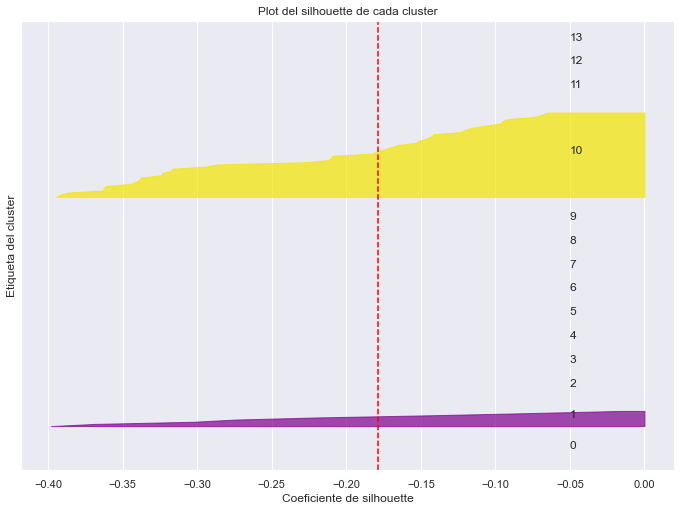

In [32]:
silhouette_avg=silhouette_score(stock_data_normalizado, kmeans.labels_)
sample_silhouette_values= silhouette_samples(stock_data_normalizado, kmeans.labels_)


def graficarSilhouette (k, labels, sample_silhouette_values, silhouette_avg):
  fig, ax1 = plt.subplots(1, 1)
  y_lower = 10
  for i in range(k):
      ith_cluster_silhouette_values = \
          sample_silhouette_values[labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / k)
      ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
      y_lower = y_upper + 10

  ax1.set_title("Plot del silhouette de cada cluster")
  ax1.set_xlabel("Coeficiente de silhouette")
  ax1.set_ylabel("Etiqueta del cluster")
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
  ax1.set_yticks([])

graficarSilhouette (k, kmeans.labels_, sample_silhouette_values, silhouette_avg)

al evaluar con k=14 en el grafico de silhouette:
valor max que alcanzan es 0 ->es muy bajo, los grupos tienden a nros negativos->no me da la certeza que datos que aparecen corresponden al grupo que alli aparece

luego al calcular inercias y hacer grafico de codo veo que el kmean =7
y ahi al hacer grafico silhouette me encuentro un grafico mejor

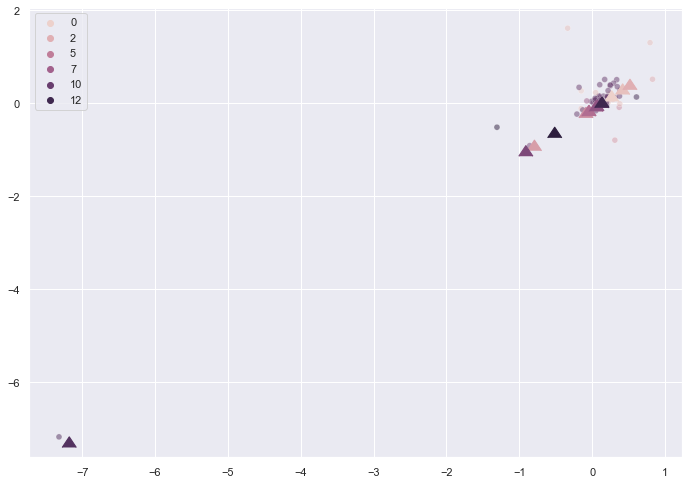

In [19]:
#este es otro grafico auxiliar ->EN ESTE CASO ESTA HECJO RARISIMOOOOOO SOBRE K=14

#grafica 2 colores añ ser k=2 y hue=[0, 1 ] al ser k=2 
#Grafica [:,0] toda la columna 0 que es actividad y [:,2] toda la columna 2 que es instagram

import seaborn as sns

# Indico tamaño
g = sns.set(rc={'figure.figsize':(11.7,8.27)}) 
# Indico columnas
g = sns.scatterplot(x = stock_data_normalizado[:,2], y = stock_data_normalizado[:, 3], hue = kmeans.labels_, alpha = 0.5)
# Indico centroides
g = sns.scatterplot(x = kmeans.cluster_centers_[:,3], y = kmeans.cluster_centers_[:,3], zorder = 10, hue = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], legend = False, marker=6, s=200)
                                                        

In [33]:
#ahora clculo inercias y hago grafico de codo, me fijo donde quiebra y hago grafico silhouette

def inercias_por_k(df_escalado):
  inercias = {}
  for i in range(1,11):
      kmeans = KMeans(n_clusters = i, init="random", n_init=10, max_iter=300, random_state=123457)
      kmeans.fit(df_escalado)
      inercias[i] = kmeans.inertia_
  return inercias

In [34]:
inercias =inercias_por_k(stock_data_normalizado)

In [35]:
inercias

{1: 57780.000000000015,
 2: 38971.711992653734,
 3: 28677.700172041903,
 4: 19607.487209389514,
 5: 14497.33618465505,
 6: 11625.157875595343,
 7: 9428.822990816832,
 8: 16389.81569362645,
 9: 16111.529346376221,
 10: 15973.771508018792}

In [36]:
#hago grafico del codo
df_inercias=pd.DataFrame(inercias.items(), columns=["K", "inercia"])

<AxesSubplot:xlabel='K', ylabel='inercia'>

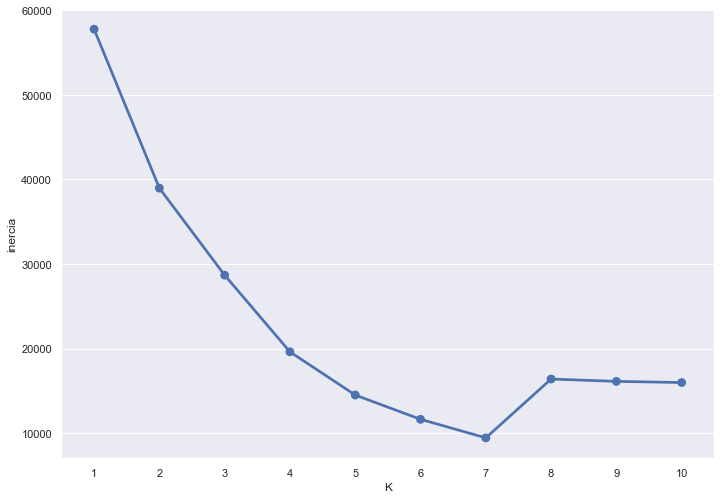

In [37]:
sns.pointplot(data= df_inercias, x="K", y="inercia")

In [38]:
k=7
kmeans = KMeans(n_clusters= k, init="random", n_init=10, max_iter=300, random_state=1234567)
kmeans.fit(stock_data_normalizado)

KMeans(init='random', n_clusters=7, random_state=1234567)

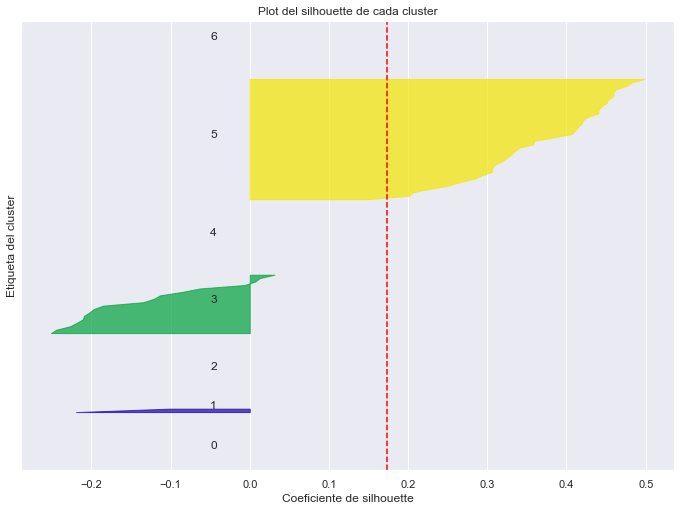

In [39]:
silhouette_avg=silhouette_score(stock_data_normalizado, kmeans.labels_)
sample_silhouette_values= silhouette_samples(stock_data_normalizado, kmeans.labels_)


def graficarSilhouette (k, labels, sample_silhouette_values, silhouette_avg):
  fig, ax1 = plt.subplots(1, 1)
  y_lower = 10
  for i in range(k):
      ith_cluster_silhouette_values = \
          sample_silhouette_values[labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / k)
      ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
      y_lower = y_upper + 10

  ax1.set_title("Plot del silhouette de cada cluster")
  ax1.set_xlabel("Coeficiente de silhouette")
  ax1.set_ylabel("Etiqueta del cluster")
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
  ax1.set_yticks([])

graficarSilhouette (k, kmeans.labels_, sample_silhouette_values, silhouette_avg)